In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [5]:
census_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Census_Income/Training_set_census.csv" )

In [6]:
census_data.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,reason_for_unemployment,full_parttime_employment_stat,capital_gains,capital_losses,dividend_from_Stocks,tax_filer_status,region_of_previous_residence,state_of_previous_residence,d_household_family_stat,d_household_summary,migration_msa,migration_reg,migration_within_reg,live_1_year_ago,migration_sunbelt,num_person_Worked_employer,family_members_under_18,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,23,Private,43,22,Some college but no degree,0,College or university,Never married,Education,Adm support including clerical,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,Peru,Peru,United-States,Native- Born in the United States,0,Not in universe,2,30,95,0
1,24,Private,34,2,Bachelors degree(BA AB BS),0,Not in universe,Never married,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,No,Not in universe,Children or Armed Forces,0,0,0,Single,West,California,Nonfamily householder,Householder,MSA to MSA,Different county same state,Different county same state,No,No,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,94,0
2,38,Private,34,2,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,250,Joint both under 65,Not in universe,Not in universe,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,1
3,33,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Joint both under 65,Not in universe,Not in universe,Child 18+ ever marr RP of subfamily,Child 18 or older,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
4,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,0


In [11]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               200000 non-null  int64 
 1   class_of_worker                   200000 non-null  object
 2   industry_code                     200000 non-null  int64 
 3   occupation_code                   200000 non-null  int64 
 4   education                         200000 non-null  object
 5   wage_per_hour                     200000 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       200000 non-null  object
 7   marital_status                    200000 non-null  object
 8   major_industry_code               200000 non-null  object
 9   major_occupation_code             200000 non-null  object
 10  race                              200000 non-null  object
 11  hispanic_origin                   199408 non-null  object
 12  se

In [12]:
census_data.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,34.662495,15.564830,11.326325,54.835700,493.561580,38.921275,212.977630,1.983780,0.177995,1.522860,23.541820,94.499800,0.074360
std,22.225765,18.104961,14.424809,272.034681,5109.900136,277.867944,2062.591247,2.372892,0.557014,0.846346,24.447497,0.500001,0.262357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,10.000000,94.000000,0.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


In [14]:
census_data.isnull().sum()

age                                     0
class_of_worker                         0
industry_code                           0
occupation_code                         0
education                               0
wage_per_hour                           0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       592
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
capital_gains                           0
capital_losses                          0
dividend_from_Stocks                    0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           477
d_household_family_stat                 0
d_household_summary               

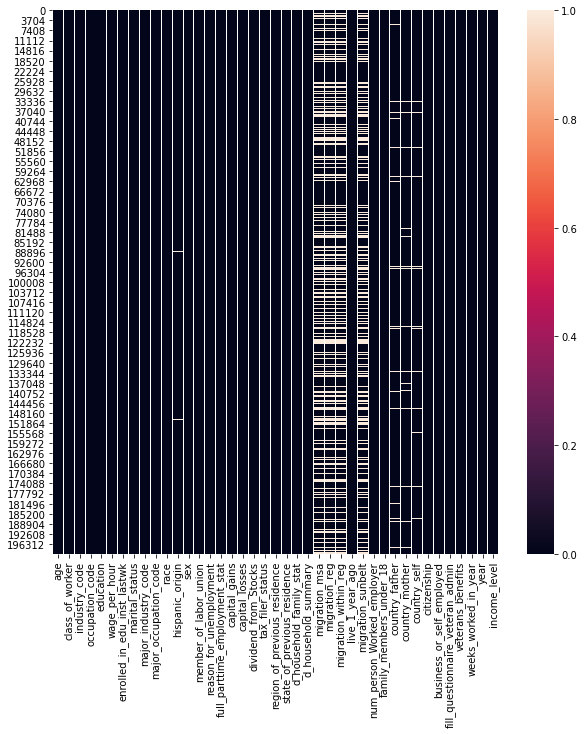

In [62]:
figure=plt.figure(figsize=(10,10))
sns.heatmap(census_data.isnull())

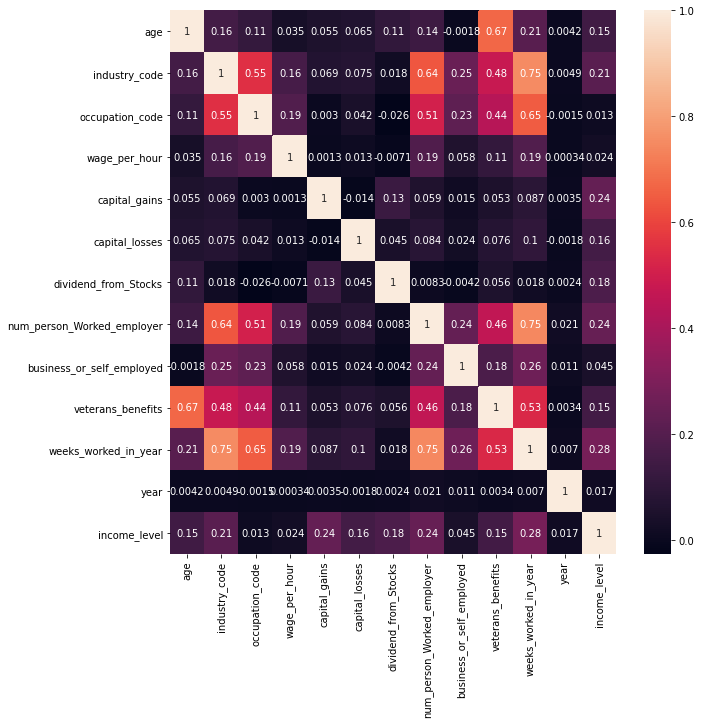

In [66]:
figure=plt.figure(figsize=(10,10))
sns.heatmap(census_data.corr(),annot=True)

In [16]:
cols_drop = ['hispanic_origin','state_of_previous_residence','migration_msa','migration_reg','migration_within_reg','migration_sunbelt','country_father','country_mother','country_self','income_level']

In [33]:
X=census_data.drop(cols_drop,axis=1)

In [36]:
X=X.drop(['race','sex','reason_for_unemployment','region_of_previous_residence','live_1_year_ago','citizenship'],axis=1)

In [37]:
X.isnull().sum()

age                                 0
class_of_worker                     0
industry_code                       0
occupation_code                     0
education                           0
wage_per_hour                       0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
member_of_labor_union               0
full_parttime_employment_stat       0
capital_gains                       0
capital_losses                      0
dividend_from_Stocks                0
tax_filer_status                    0
d_household_family_stat             0
d_household_summary                 0
num_person_Worked_employer          0
family_members_under_18             0
business_or_self_employed           0
fill_questionnaire_veteran_admin    0
veterans_benefits                   0
weeks_worked_in_year                0
year                                0
dtype: int64

In [38]:
y=census_data['income_level']

In [39]:
X.tail()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,member_of_labor_union,full_parttime_employment_stat,capital_gains,capital_losses,dividend_from_Stocks,tax_filer_status,d_household_family_stat,d_household_summary,num_person_Worked_employer,family_members_under_18,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year
199995,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,0,Both parents present,0,Not in universe,0,0,95
199996,32,Private,39,19,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Personal services except private HH,Sales,No,Children or Armed Forces,5178,0,0,Joint both under 65,Householder,Householder,4,Not in universe,0,Not in universe,2,52,94
199997,18,Not in universe,0,0,11th grade,0,High school,Never married,Not in universe or children,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,0,Not in universe,0,Not in universe,2,0,94
199998,45,State government,43,33,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Education,Precision production craft & repair,Not in universe,Full-time schedules,0,0,200,Joint both under 65,Householder,Householder,6,Not in universe,0,Not in universe,2,52,95
199999,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,0,Both parents present,0,Not in universe,0,0,95


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [40]:
X['class_of_worker']=le.fit_transform(X['class_of_worker'])

In [41]:
X.tail()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,member_of_labor_union,full_parttime_employment_stat,capital_gains,capital_losses,dividend_from_Stocks,tax_filer_status,d_household_family_stat,d_household_summary,num_person_Worked_employer,family_members_under_18,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year
199995,2,12,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,0,Both parents present,0,Not in universe,0,0,95
199996,32,13,39,19,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Personal services except private HH,Sales,No,Children or Armed Forces,5178,0,0,Joint both under 65,Householder,Householder,4,Not in universe,0,Not in universe,2,52,94
199997,18,12,0,0,11th grade,0,High school,Never married,Not in universe or children,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,0,Not in universe,0,Not in universe,2,0,94
199998,45,16,43,33,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Education,Precision production craft & repair,Not in universe,Full-time schedules,0,0,200,Joint both under 65,Householder,Householder,6,Not in universe,0,Not in universe,2,52,95
199999,9,12,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,0,Both parents present,0,Not in universe,0,0,95


In [42]:
X['education']=le.fit_transform(X['education'])
X['enrolled_in_edu_inst_lastwk']=le.fit_transform(X['enrolled_in_edu_inst_lastwk'])
X['marital_status']=le.fit_transform(X['marital_status'])
X['major_industry_code']=le.fit_transform(X['major_industry_code'])

In [43]:
X.tail()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,member_of_labor_union,full_parttime_employment_stat,capital_gains,capital_losses,dividend_from_Stocks,tax_filer_status,d_household_family_stat,d_household_summary,num_person_Worked_employer,family_members_under_18,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year
199995,2,12,0,0,27,0,5,11,38,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,0,Both parents present,0,Not in universe,0,0,95
199996,32,13,39,19,25,0,5,9,40,Sales,No,Children or Armed Forces,5178,0,0,Joint both under 65,Householder,Householder,4,Not in universe,0,Not in universe,2,52,94
199997,18,12,0,0,18,0,4,11,38,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,0,Not in universe,0,Not in universe,2,0,94
199998,45,16,43,33,26,0,5,9,29,Precision production craft & repair,Not in universe,Full-time schedules,0,0,200,Joint both under 65,Householder,Householder,6,Not in universe,0,Not in universe,2,52,95
199999,9,12,0,0,27,0,5,11,38,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,0,Both parents present,0,Not in universe,0,0,95


In [44]:
X['major_occupation_code']=le.fit_transform(X['major_occupation_code'])
X['member_of_labor_union']=le.fit_transform(X['member_of_labor_union'])
X['full_parttime_employment_stat']=le.fit_transform(X['full_parttime_employment_stat'])
X['tax_filer_status']=le.fit_transform(X['tax_filer_status'])

X['d_household_family_stat']=le.fit_transform(X['d_household_family_stat'])
X['d_household_summary']=le.fit_transform(X['d_household_summary'])
X['family_members_under_18']=le.fit_transform(X['family_members_under_18'])
X['fill_questionnaire_veteran_admin']=le.fit_transform(X['fill_questionnaire_veteran_admin'])

In [45]:
X.tail()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,member_of_labor_union,full_parttime_employment_stat,capital_gains,capital_losses,dividend_from_Stocks,tax_filer_status,d_household_family_stat,d_household_summary,num_person_Worked_employer,family_members_under_18,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year
199995,2,12,0,0,27,0,5,11,38,21,4,8,0,0,0,10,45,10,0,5,0,4,0,0,95
199996,32,13,39,19,25,0,5,9,40,27,3,8,5178,0,0,8,56,12,4,9,0,4,2,52,94
199997,18,12,0,0,18,0,4,11,38,21,4,8,0,0,0,10,39,8,0,9,0,4,2,0,94
199998,45,16,43,33,26,0,5,9,29,23,4,9,0,0,200,8,56,12,6,9,0,4,2,52,95
199999,9,12,0,0,27,0,5,11,38,21,4,8,0,0,0,10,45,10,0,5,0,4,0,0,95


In [46]:
y.isnull().sum()

0

In [48]:
X.isnull().sum()

age                                 0
class_of_worker                     0
industry_code                       0
occupation_code                     0
education                           0
wage_per_hour                       0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
member_of_labor_union               0
full_parttime_employment_stat       0
capital_gains                       0
capital_losses                      0
dividend_from_Stocks                0
tax_filer_status                    0
d_household_family_stat             0
d_household_summary                 0
num_person_Worked_employer          0
family_members_under_18             0
business_or_self_employed           0
fill_questionnaire_veteran_admin    0
veterans_benefits                   0
weeks_worked_in_year                0
year                                0
dtype: int64

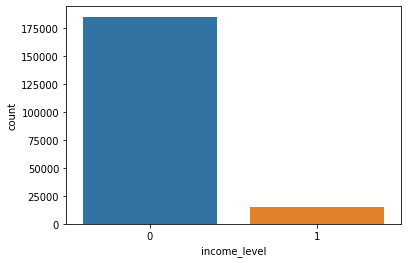

In [49]:
sns.countplot(y)

In [53]:
y[y==1].count()

14872

In [54]:
y[y==0].count()

185128

In [55]:
X.corr()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,member_of_labor_union,full_parttime_employment_stat,capital_gains,capital_losses,dividend_from_Stocks,tax_filer_status,d_household_family_stat,d_household_summary,num_person_Worked_employer,family_members_under_18,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year
age,1.000000,0.018708,0.158182,0.114145,0.005507,0.035395,0.039206,-0.119514,-0.027801,0.001073,-0.008503,0.063098,0.055206,0.064830,0.107224,-0.140949,0.271784,0.226103,0.140495,0.384767,-0.001813,-0.008607,0.673449,0.206619,0.004231
class_of_worker,0.018708,1.000000,0.077567,0.093726,0.868679,0.013039,0.933702,0.872495,0.876204,0.890514,0.940900,0.925886,0.014346,0.013764,0.004323,0.855786,0.833698,0.859549,0.043480,0.833669,0.026315,0.964850,0.058805,0.098173,-0.000721
industry_code,0.158182,0.077567,1.000000,0.554163,0.083318,0.162421,-0.010345,-0.123838,-0.011628,0.048825,-0.041763,0.031191,0.069239,0.074650,0.018482,-0.098651,0.149916,0.108294,0.639184,0.255852,0.252211,-0.000246,0.475955,0.753862,0.004907
occupation_code,0.114145,0.093726,0.554163,1.000000,0.032064,0.192234,-0.011464,-0.102056,-0.072349,0.031466,-0.029581,0.037609,0.002999,0.042191,-0.026208,-0.072478,0.094821,0.061035,0.507461,0.227869,0.225696,-0.000765,0.435101,0.647926,-0.001473
education,0.005507,0.868679,0.083318,0.032064,1.000000,0.022615,0.862054,0.793289,0.811616,0.810712,0.866085,0.843295,0.018559,0.017736,0.015662,0.777733,0.773451,0.795091,0.077978,0.773823,0.030614,0.886419,-0.000927,0.096382,-0.000482
wage_per_hour,0.035395,0.013039,0.162421,0.192234,0.022615,1.000000,0.003758,-0.027424,-0.008809,0.014307,-0.061124,0.006216,0.001274,0.012743,-0.007117,-0.022167,0.035800,0.027067,0.187814,0.065092,0.058137,0.003803,0.111601,0.192913,0.000336
enrolled_in_edu_inst_lastwk,0.039206,0.933702,-0.010345,-0.011464,0.862054,0.003758,1.000000,0.873391,0.885788,0.883017,0.946892,0.916423,0.005915,0.005143,0.004737,0.844539,0.848419,0.880919,-0.015135,0.800094,-0.025582,0.964217,-0.039067,0.006669,-0.001638
marital_status,-0.119514,0.872495,-0.123838,-0.102056,0.793289,-0.027424,0.873391,1.000000,0.862140,0.835665,0.904610,0.864139,-0.019920,-0.016201,-0.012462,0.914284,0.684401,0.725253,-0.120860,0.668625,-0.040111,0.917967,-0.158130,-0.156668,-0.003452
major_industry_code,-0.027801,0.876204,-0.011628,-0.072349,0.811616,-0.008809,0.885788,0.862140,1.000000,0.859790,0.901643,0.871560,-0.008187,-0.007873,-0.002251,0.839913,0.759267,0.792311,-0.050121,0.733125,-0.031831,0.917836,-0.050313,-0.073763,-0.002803
major_occupation_code,0.001073,0.890514,0.048825,0.031466,0.810712,0.014307,0.883017,0.835665,0.859790,1.000000,0.893890,0.872958,0.008115,0.013105,0.000371,0.818640,0.771243,0.799416,0.027922,0.767555,0.016009,0.912145,0.018623,0.033957,-0.000622


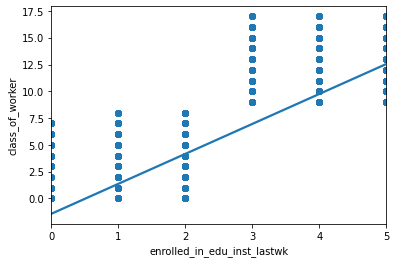

In [57]:
sns.regplot('enrolled_in_edu_inst_lastwk','class_of_worker',data=X)

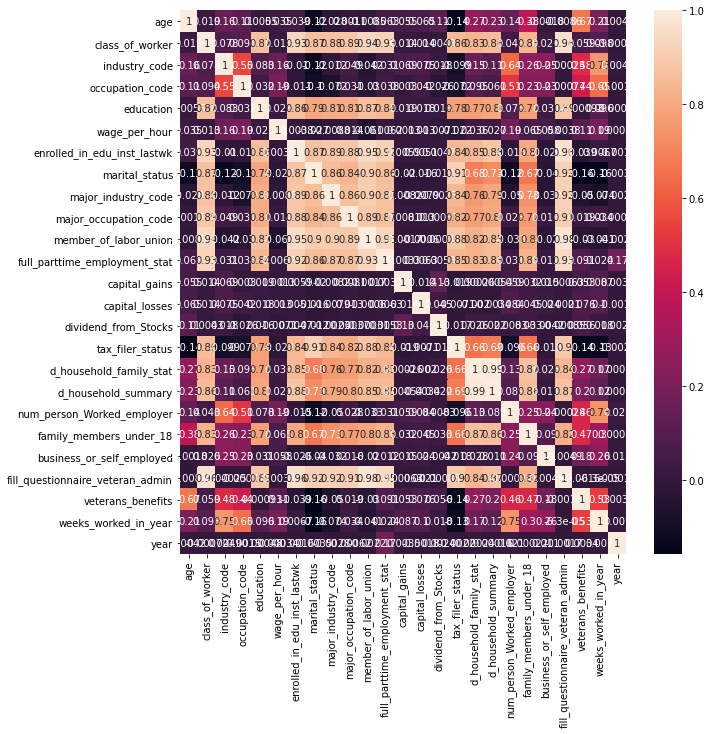

In [67]:
figure=plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True)

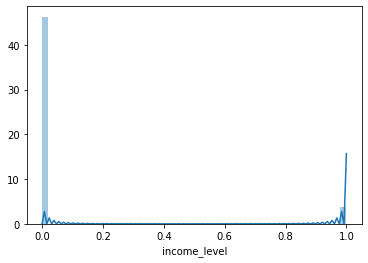

In [69]:
sns.distplot(y)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [159]:
model = RandomForestClassifier()

In [128]:
model1=SVC()

In [132]:
model2=DecisionTreeClassifier()

In [136]:
model3=LogisticRegression()

In [147]:
model4 = KNeighborsClassifier(n_neighbors=3)

In [160]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
model1.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [133]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [137]:
model3.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
model4.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [161]:
pred=model.predict(X_test)

In [130]:
pred1=model1.predict(X_test)

In [134]:
pred2=model2.predict(X_test)




In [138]:
pred3=model3.predict(X_test)

In [145]:
pred4=model4.predict(X_test)

In [77]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
y_test[:10]

119737    0
72272     0
158154    0
65426     0
30074     1
23677     0
134858    0
176418    0
132467    1
4082      0
Name: income_level, dtype: int64

In [82]:
from sklearn.metrics import f1_score

In [162]:
print(f1_score(y_test,pred,average='weighted'))

0.9392369716491222


In [131]:
print(f1_score(y_test,pred1,average='weighted'))

0.913753647163045


In [135]:
print(f1_score(y_test,pred2,average='weighted'))

0.9206846621555782


In [139]:
print(f1_score(y_test,pred3,average='weighted'))

0.9197649553502232


In [149]:
print(f1_score(y_test,pred4,average='weighted'))

0.9312990493259014


In [107]:
from sklearn.metrics import accuracy_score

In [108]:
print(accuracy_score(y_test,pred))

0.9453636363636364


In [88]:
from sklearn.metrics import confusion_matrix

In [163]:
con_m=confusion_matrix(y_test,pred)

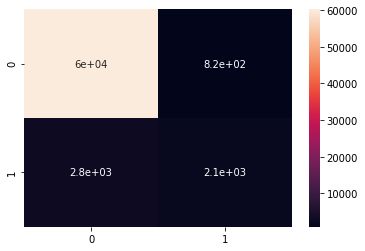

In [164]:
sns.heatmap(con_m,annot=True)

In [112]:
print(con_m)

[[60246   834]
 [ 2772  2148]]


In [165]:
from sklearn.metrics import classification_report

In [166]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     61080
           1       0.72      0.44      0.54      4920

    accuracy                           0.95     66000
   macro avg       0.84      0.71      0.76     66000
weighted avg       0.94      0.95      0.94     66000



In [114]:
census_eval = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Census_Income/Testing_set_census.csv" )

In [115]:
census_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   age                               50000 non-null  int64 
 1   class_of_worker                   50000 non-null  object
 2   industry_code                     50000 non-null  int64 
 3   occupation_code                   50000 non-null  int64 
 4   education                         50000 non-null  object
 5   wage_per_hour                     50000 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       50000 non-null  object
 7   marital_status                    50000 non-null  object
 8   major_industry_code               50000 non-null  object
 9   major_occupation_code             50000 non-null  object
 10  race                              50000 non-null  object
 11  hispanic_origin                   49854 non-null  object
 12  sex               

In [116]:
census_eval.isnull().sum()

age                                     0
class_of_worker                         0
industry_code                           0
occupation_code                         0
education                               0
wage_per_hour                           0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       146
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
capital_gains                           0
capital_losses                          0
dividend_from_Stocks                    0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           117
d_household_family_stat                 0
d_household_summary               

In [118]:
cols_drop = ['hispanic_origin','state_of_previous_residence','migration_msa','migration_reg','migration_within_reg','migration_sunbelt','country_father','country_mother','country_self']

In [120]:
X1=census_eval.drop(cols_drop,axis=1)

In [121]:
X1=X1.drop(['race','sex','reason_for_unemployment','region_of_previous_residence','live_1_year_ago','citizenship'],axis=1)

In [122]:
X1.isnull().any()

age                                 False
class_of_worker                     False
industry_code                       False
occupation_code                     False
education                           False
wage_per_hour                       False
enrolled_in_edu_inst_lastwk         False
marital_status                      False
major_industry_code                 False
major_occupation_code               False
member_of_labor_union               False
full_parttime_employment_stat       False
capital_gains                       False
capital_losses                      False
dividend_from_Stocks                False
tax_filer_status                    False
d_household_family_stat             False
d_household_summary                 False
num_person_Worked_employer          False
family_members_under_18             False
business_or_self_employed           False
fill_questionnaire_veteran_admin    False
veterans_benefits                   False
weeks_worked_in_year              

In [123]:
X1['class_of_worker']=le.fit_transform(X1['class_of_worker'])
X1['education']=le.fit_transform(X1['education'])
X1['enrolled_in_edu_inst_lastwk']=le.fit_transform(X1['enrolled_in_edu_inst_lastwk'])
X1['marital_status']=le.fit_transform(X1['marital_status'])
X1['major_industry_code']=le.fit_transform(X1['major_industry_code'])

X1['major_occupation_code']=le.fit_transform(X1['major_occupation_code'])
X1['member_of_labor_union']=le.fit_transform(X1['member_of_labor_union'])
X1['full_parttime_employment_stat']=le.fit_transform(X1['full_parttime_employment_stat'])
X1['tax_filer_status']=le.fit_transform(X1['tax_filer_status'])

X1['d_household_family_stat']=le.fit_transform(X1['d_household_family_stat'])
X1['d_household_summary']=le.fit_transform(X1['d_household_summary'])
X1['family_members_under_18']=le.fit_transform(X1['family_members_under_18'])
X1['fill_questionnaire_veteran_admin']=le.fit_transform(X1['fill_questionnaire_veteran_admin'])

In [124]:
X1.tail()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,member_of_labor_union,full_parttime_employment_stat,capital_gains,capital_losses,dividend_from_Stocks,tax_filer_status,d_household_family_stat,d_household_summary,num_person_Worked_employer,family_members_under_18,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year
49995,2,3,0,0,10,0,2,4,14,6,1,0,0,0,0,4,8,2,0,0,0,1,0,0,94
49996,42,4,26,38,12,0,2,2,11,14,1,0,0,0,0,2,14,4,6,4,0,1,2,52,94
49997,41,4,4,34,5,0,2,2,4,8,1,1,0,0,0,2,27,7,2,4,0,1,2,26,95
49998,77,12,0,0,29,0,5,9,38,21,4,8,0,0,0,10,62,15,0,9,0,4,2,0,94
49999,7,3,0,0,10,0,2,4,14,6,1,0,0,0,0,4,22,6,0,0,0,1,0,0,95


In [125]:
predictions=model.predict(X1)

In [127]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = X1.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_HP.csv')         
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>